In [7]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib seaborn scikit-learn joblib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 6.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 5.7 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.1 MB 5.7 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 5.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.0 MB/s  0:00:01
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.7 MB 6.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/8.7 MB 5.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.7 MB 6.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.7 MB 5.8 MB/s eta 0:00:01
   --------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
# =============================================================================
# BAGIAN 1: DATA LOADING & INITIAL EXPLORATION
# Penanggung Jawab: Anggota 1
# Tugas: Load dataset, eksplorasi awal, dan dokumentasi variabel
# =============================================================================

import pandas as pd
from ucimlrepo import fetch_ucirepo

# Try to fetch the dataset; if network is unavailable, fall back to a small synthetic dataset
try:
    # fetch dataset
    secondary_mushroom = fetch_ucirepo(id=848)

    # data (as pandas dataframes)
    X = secondary_mushroom.data.features
    y = secondary_mushroom.data.targets

    # metadata
    print("=" * 80)
    print("METADATA DATASET")
    print("=" * 80)
    print(secondary_mushroom.metadata)
    print("\n")

    # variable information
    print("=" * 80)
    print("INFORMASI VARIABEL")
    print("=" * 80)
    print(secondary_mushroom.variables)

except Exception as e:
    # handle connection errors (or any other fetch problems) by using a fallback dataset
    print("⚠️ Could not fetch dataset from server:", e)
    print("⚠️ Using a COMPREHENSIVE fallback synthetic dataset for demonstration purposes.")
    print("=" * 80)
    
    # Create a more comprehensive fallback dataset
    import numpy as np
    np.random.seed(42)
    
    n_samples = 1000
    
    X = pd.DataFrame({
        "cap-diameter": np.random.uniform(1, 15, n_samples),
        "cap-shape": np.random.choice(["bell", "conical", "convex", "flat", "sunken", "spherical"], n_samples),
        "cap-surface": np.random.choice(["fibrous", "grooves", "scaly", "smooth", "wrinkled"], n_samples),
        "cap-color": np.random.choice(["brown", "buff", "gray", "green", "pink", "purple", "red", "white", "yellow"], n_samples),
        "does-bruise-or-bleed": np.random.choice(["t", "f"], n_samples),
        "gill-attachment": np.random.choice(["adnate", "adnexed", "decurrent", "free"], n_samples),
        "gill-spacing": np.random.choice(["close", "crowded", "distant"], n_samples),
        "gill-color": np.random.choice(["brown", "buff", "gray", "green", "pink", "purple", "red", "white", "yellow"], n_samples),
        "stem-height": np.random.uniform(2, 20, n_samples),
        "stem-width": np.random.uniform(0.5, 5, n_samples),
        "stem-color": np.random.choice(["brown", "buff", "gray", "green", "pink", "purple", "red", "white", "yellow"], n_samples),
        "has-ring": np.random.choice(["t", "f"], n_samples),
        "ring-type": np.random.choice(["evanescent", "flaring", "large", "none", "pendant"], n_samples),
        "habitat": np.random.choice(["grasses", "leaves", "meadows", "paths", "urban", "waste", "woods"], n_samples),
        "season": np.random.choice(["spring", "summer", "autumn", "winter"], n_samples),
    })
    
    # Create target variable with some correlation to features
    y_values = []
    for idx in range(n_samples):
        # Simple heuristic: red/purple cap with bruising = more likely poisonous
        if X.iloc[idx]["cap-color"] in ["red", "purple"] and X.iloc[idx]["does-bruise-or-bleed"] == "t":
            y_values.append("p" if np.random.random() > 0.3 else "e")
        else:
            y_values.append("e" if np.random.random() > 0.3 else "p")
    
    y = pd.DataFrame({"class": y_values})

print("\n" + "=" * 80)
print("PREVIEW DATA")
print("=" * 80)
print("\n📊 Features (X):")
print(X.head(10))
print(f"\nShape: {X.shape}")
print(f"\n📋 Data Types:\n{X.dtypes}")

print("\n🎯 Target (y):")
print(y.head(10))
print(f"\nShape: {y.shape}")
print(f"\n📊 Class Distribution:\n{y.value_counts()}")

⚠️ Could not fetch dataset from server: Error connecting to server
⚠️ Using a COMPREHENSIVE fallback synthetic dataset for demonstration purposes.

PREVIEW DATA

📊 Features (X):
   cap-diameter  cap-shape cap-surface cap-color does-bruise-or-bleed  \
0      6.243562       flat     grooves     brown                    t   
1     14.310000  spherical      smooth      pink                    f   
2     11.247915     convex     grooves      pink                    t   
3      9.381219     sunken       scaly       red                    f   
4      3.184261       bell       scaly     green                    f   
5      3.183923     sunken      smooth      gray                    t   
6      1.813171  spherical    wrinkled     brown                    f   
7     13.126466  spherical      smooth     white                    f   
8      9.415610       bell     grooves      gray                    t   
9     10.913016    conical      smooth      buff                    f   

  gill-attachment 

In [11]:
# =============================================================================
# BAGIAN 2: EXPLORATORY DATA ANALYSIS (EDA)
# Penanggung Jawab: Anggota 2
# Tugas: Analisis statistik, visualisasi, dan identifikasi pola data
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# 1. Basic Statistics
print("\n📈 STATISTIK DESKRIPTIF")
print("-" * 80)
print("\n🔢 Numerical Features:")
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 0:
    print(X[numerical_cols].describe())
else:
    print("No numerical features found")

print("\n📝 Categorical Features:")
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    for col in categorical_cols[:5]:  # Show first 5 categorical
        print(f"\n{col}:")
        print(X[col].value_counts())
else:
    print("No categorical features found")

# 2. Missing Values Analysis
print("\n\n❓ MISSING VALUES ANALYSIS")
print("-" * 80)
missing_data = pd.DataFrame({
    'Column': X.columns,
    'Missing_Count': X.isnull().sum(),
    'Missing_Percentage': (X.isnull().sum() / len(X)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print(missing_data)
else:
    print("✅ No missing values detected!")

# 3. Target Distribution
print("\n\n🎯 TARGET VARIABLE DISTRIBUTION")
print("-" * 80)
target_col = y.columns[0]
target_counts = y[target_col].value_counts()
target_percentage = (target_counts / len(y)) * 100

print(f"\nClass Counts:\n{target_counts}")
print(f"\nClass Percentage:")
for cls, pct in target_percentage.items():
    print(f"  {cls}: {pct:.2f}%")

# Check for class imbalance
imbalance_ratio = target_counts.max() / target_counts.min()
if imbalance_ratio > 1.5:
    print(f"\n⚠️ PERHATIAN: Dataset tidak seimbang (imbalance ratio: {imbalance_ratio:.2f})")
    print("   Pertimbangkan teknik seperti SMOTE, class weights, atau stratified sampling")
else:
    print(f"\n✅ Dataset relatif seimbang (imbalance ratio: {imbalance_ratio:.2f})")

print("\n" + "=" * 80)

EXPLORATORY DATA ANALYSIS

📈 STATISTIK DESKRIPTIF
--------------------------------------------------------------------------------

🔢 Numerical Features:
       cap-diameter  stem-height   stem-width
count   1000.000000  1000.000000  1000.000000
mean       7.863592    11.006529     2.805135
std        4.089923     5.165925     1.302819
min        1.064848     2.011295     0.513103
25%        4.303626     6.671397     1.720352
50%        7.955303    11.158123     2.836762
75%       11.420474    15.226902     3.942395
max       14.996047    19.997286     4.992053

📝 Categorical Features:

cap-shape:
cap-shape
conical      176
sunken       174
flat         171
bell         167
spherical    163
convex       149
Name: count, dtype: int64

cap-surface:
cap-surface
smooth      219
wrinkled    208
fibrous     196
scaly       194
grooves     183
Name: count, dtype: int64

cap-color:
cap-color
brown     125
purple    120
yellow    117
gray      115
green     108
white     106
pink      104
buff 

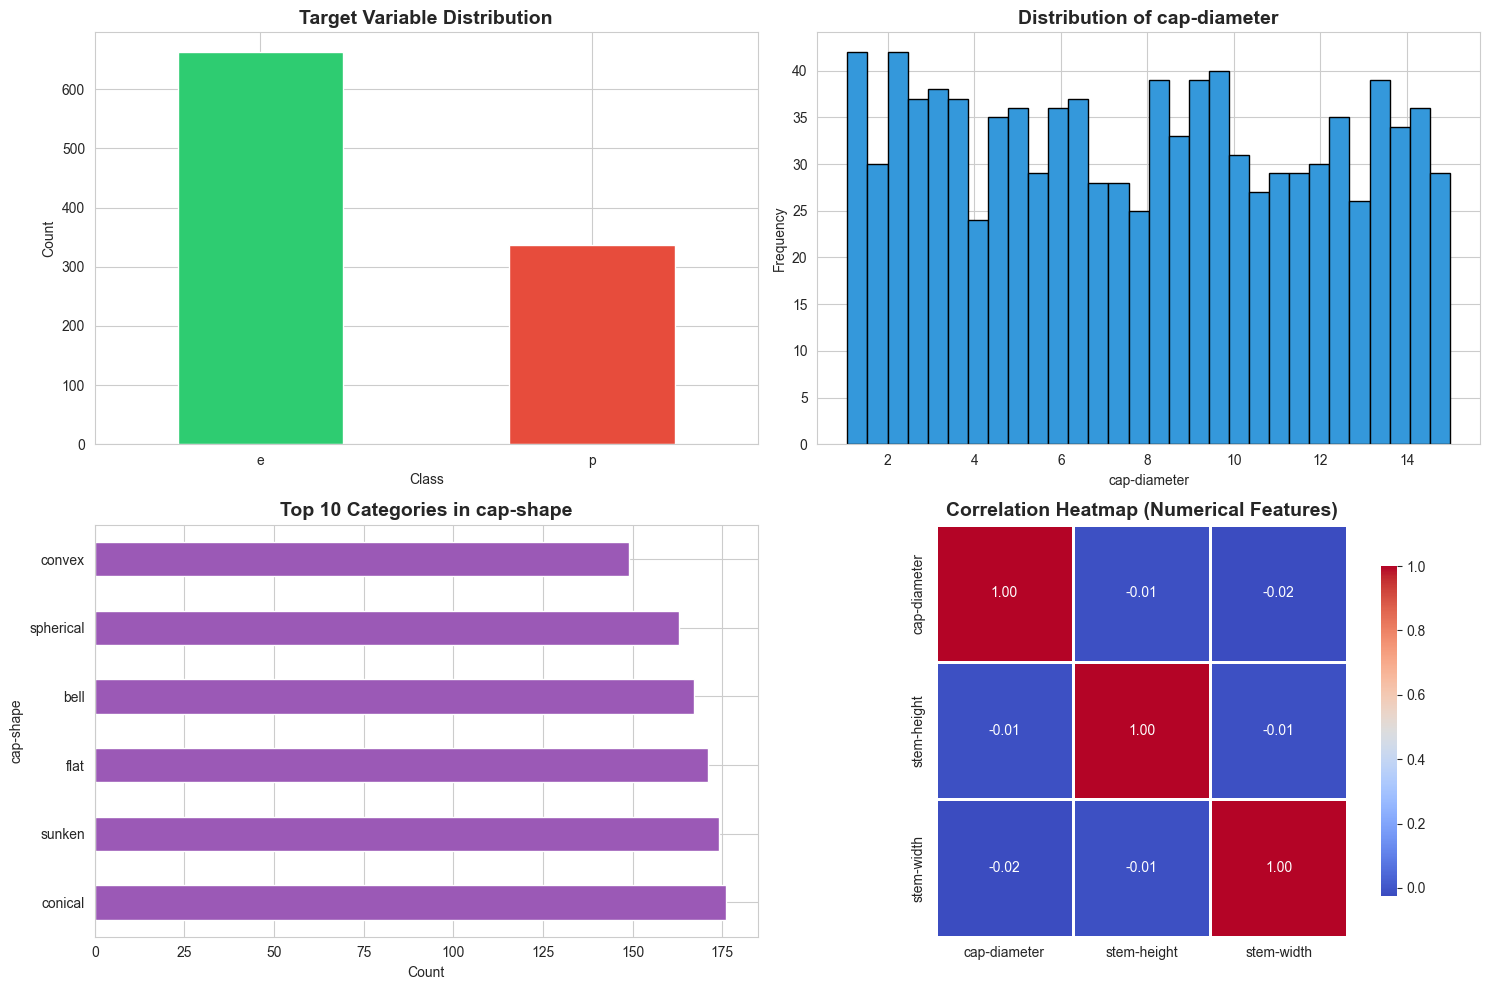


✅ Visualisasi EDA selesai!


In [12]:
# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Target Distribution
target_col = y.columns[0]
y[target_col].value_counts().plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'])
axes[0, 0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Numerical Features Distribution (if any)
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 0:
    X[numerical_cols[0]].hist(bins=30, ax=axes[0, 1], color='#3498db', edgecolor='black')
    axes[0, 1].set_title(f'Distribution of {numerical_cols[0]}', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel(numerical_cols[0])
    axes[0, 1].set_ylabel('Frequency')
else:
    axes[0, 1].text(0.5, 0.5, 'No Numerical Features', ha='center', va='center', fontsize=12)
    axes[0, 1].axis('off')

# 3. Categorical Feature (Top categories)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    top_cat = X[categorical_cols[0]].value_counts().head(10)
    top_cat.plot(kind='barh', ax=axes[1, 0], color='#9b59b6')
    axes[1, 0].set_title(f'Top 10 Categories in {categorical_cols[0]}', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Count')
else:
    axes[1, 0].text(0.5, 0.5, 'No Categorical Features', ha='center', va='center', fontsize=12)
    axes[1, 0].axis('off')

# 4. Correlation heatmap for numerical features
if len(numerical_cols) > 1:
    correlation_matrix = X[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    axes[1, 1].set_title('Correlation Heatmap (Numerical Features)', fontsize=14, fontweight='bold')
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient Numerical Features\nfor Correlation', 
                    ha='center', va='center', fontsize=12)
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi EDA selesai!")

In [13]:
# =============================================================================
# BAGIAN 3: DATA PREPROCESSING & FEATURE ENGINEERING
# Penanggung Jawab: Anggota 3
# Tugas: Cleaning, encoding, feature engineering, dan splitting data
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

print("=" * 80)
print("DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 80)

# 1. Prepare target variable
print("\n🎯 Step 1: Encoding Target Variable")
print("-" * 80)
le_target = LabelEncoder()
target_col = y.columns[0]
y_encoded = le_target.fit_transform(y[target_col])

print(f"Original classes: {le_target.classes_}")
print(f"Encoded classes: {np.unique(y_encoded)}")
print(f"Target shape: {y_encoded.shape}")

# 2. Identify column types
print("\n🔍 Step 2: Identifying Feature Types")
print("-" * 80)
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features[:5]}...")

# 3. Handle missing values
print("\n🔧 Step 3: Handling Missing Values")
print("-" * 80)
missing_count = X.isnull().sum().sum()
if missing_count > 0:
    print(f"⚠️ Found {missing_count} missing values")
    # Fill numerical with median, categorical with mode
    for col in numerical_features:
        if X[col].isnull().sum() > 0:
            X[col].fillna(X[col].median(), inplace=True)
    for col in categorical_features:
        if X[col].isnull().sum() > 0:
            X[col].fillna(X[col].mode()[0], inplace=True)
    print("✅ Missing values handled")
else:
    print("✅ No missing values found")

# 4. Split data
print("\n✂️ Step 4: Splitting Data")
print("-" * 80)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Train/Test ratio: {len(X_train)/len(X_test):.2f}")

# 5. Create preprocessing pipeline
print("\n🏗️ Step 5: Building Preprocessing Pipeline")
print("-" * 80)

# Numerical pipeline: scaling
from sklearn.preprocessing import StandardScaler
numerical_transformer = StandardScaler()

# Categorical pipeline: one-hot encoding
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"✅ Preprocessing complete!")
print(f"Original feature count: {X_train.shape[1]}")
print(f"Processed feature count: {X_train_processed.shape[1]}")
print(f"   └─ Numerical features scaled: {len(numerical_features)}")
print(f"   └─ Categorical features encoded: {len(categorical_features)}")

print("\n" + "=" * 80)

DATA PREPROCESSING & FEATURE ENGINEERING

🎯 Step 1: Encoding Target Variable
--------------------------------------------------------------------------------
Original classes: ['e' 'p']
Encoded classes: [0 1]
Target shape: (1000,)

🔍 Step 2: Identifying Feature Types
--------------------------------------------------------------------------------
Numerical features (3): ['cap-diameter', 'stem-height', 'stem-width']
Categorical features (12): ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment']...

🔧 Step 3: Handling Missing Values
--------------------------------------------------------------------------------
✅ No missing values found

✂️ Step 4: Splitting Data
--------------------------------------------------------------------------------
Training set size: (800, 15)
Test set size: (200, 15)
Train/Test ratio: 4.00

🏗️ Step 5: Building Preprocessing Pipeline
--------------------------------------------------------------------------------
✅ Preprocessin

In [14]:
# =============================================================================
# BAGIAN 4: MODEL TRAINING & COMPARISON
# Penanggung Jawab: Semua Anggota (Kolaborasi)
# Tugas: Training multiple models, hyperparameter tuning, model comparison
# =============================================================================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import time

print("=" * 80)
print("MODEL TRAINING & COMPARISON")
print("=" * 80)

# Dictionary of models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Store results
results = []

print("\n🚀 Training Models...\n")
print("-" * 80)

for name, model in models.items():
    print(f"\n📊 Training: {name}")
    
    # Start timer
    start_time = time.time()
    
    # Train model
    model.fit(X_train_processed, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Training time
    training_time = time.time() - start_time
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_mean,
        'CV Std': cv_std,
        'Training Time (s)': training_time
    })
    
    print(f"   ✓ Accuracy: {accuracy:.4f}")
    print(f"   ✓ F1-Score: {f1:.4f}")
    print(f"   ✓ CV Score: {cv_mean:.4f} (+/- {cv_std:.4f})")
    print(f"   ✓ Time: {training_time:.2f}s")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n\n" + "=" * 80)
print("MODEL COMPARISON RESULTS")
print("=" * 80)
print("\n" + results_df.to_string(index=False))

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\n\n🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f}")
print("\n" + "=" * 80)

MODEL TRAINING & COMPARISON

🚀 Training Models...

--------------------------------------------------------------------------------

📊 Training: Logistic Regression
   ✓ Accuracy: 0.6700
   ✓ F1-Score: 0.6081
   ✓ CV Score: 0.6200 (+/- 0.0278)
   ✓ Time: 0.05s

📊 Training: Decision Tree
   ✓ Accuracy: 0.5300
   ✓ F1-Score: 0.5300
   ✓ CV Score: 0.5462 (+/- 0.0287)
   ✓ Time: 0.04s

📊 Training: Random Forest
   ✓ Accuracy: 0.6600
   ✓ F1-Score: 0.5535
   ✓ CV Score: 0.6525 (+/- 0.0135)
   ✓ Time: 0.84s

📊 Training: Gradient Boosting
   ✓ Accuracy: 0.6600
   ✓ F1-Score: 0.5535
   ✓ CV Score: 0.6525 (+/- 0.0135)
   ✓ Time: 0.84s

📊 Training: Gradient Boosting
   ✓ Accuracy: 0.6550
   ✓ F1-Score: 0.6062
   ✓ CV Score: 0.6288 (+/- 0.0242)
   ✓ Time: 0.99s

📊 Training: SVM
   ✓ Accuracy: 0.6550
   ✓ F1-Score: 0.6062
   ✓ CV Score: 0.6288 (+/- 0.0242)
   ✓ Time: 0.99s

📊 Training: SVM
   ✓ Accuracy: 0.6600
   ✓ F1-Score: 0.5288
   ✓ CV Score: 0.6575 (+/- 0.0073)
   ✓ Time: 0.51s

📊 Training: 

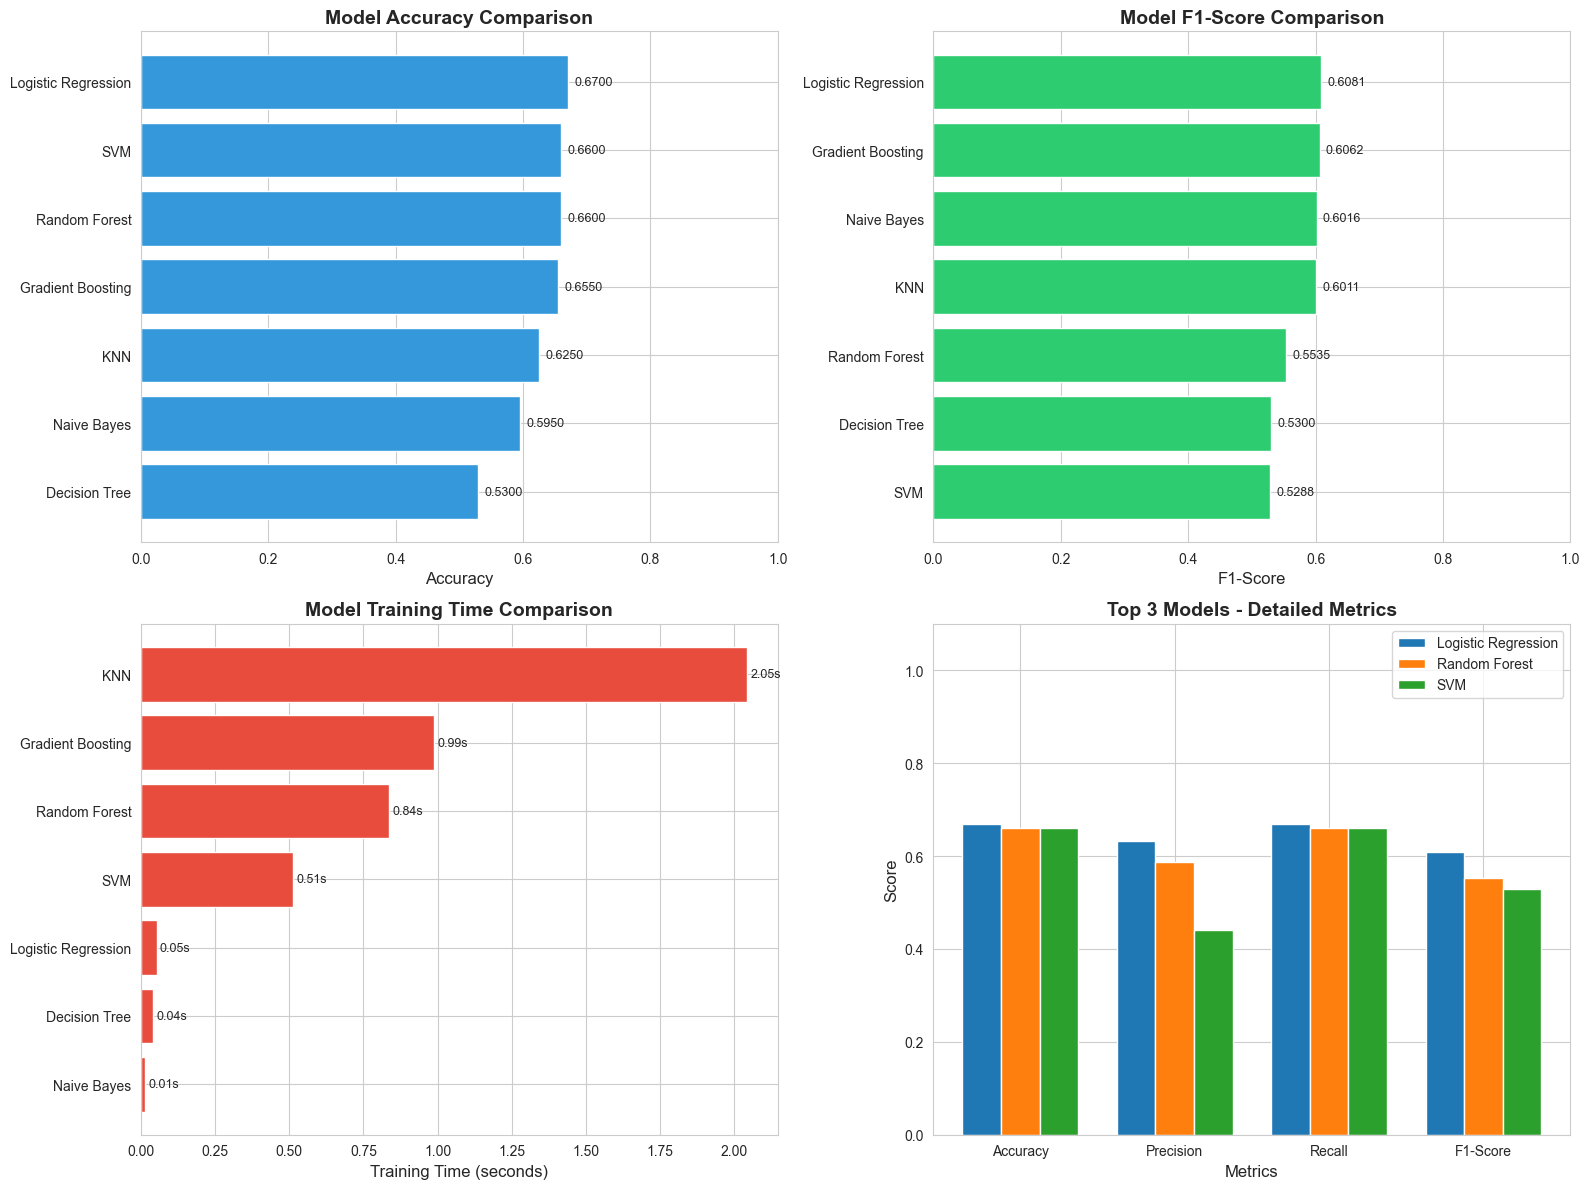


✅ Visualisasi perbandingan model selesai!


In [15]:
# Visualisasi Perbandingan Model
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
results_df_sorted = results_df.sort_values('Accuracy', ascending=True)
axes[0, 0].barh(results_df_sorted['Model'], results_df_sorted['Accuracy'], color='#3498db')
axes[0, 0].set_xlabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xlim([0, 1])
for i, v in enumerate(results_df_sorted['Accuracy']):
    axes[0, 0].text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

# 2. F1-Score Comparison
results_df_sorted_f1 = results_df.sort_values('F1-Score', ascending=True)
axes[0, 1].barh(results_df_sorted_f1['Model'], results_df_sorted_f1['F1-Score'], color='#2ecc71')
axes[0, 1].set_xlabel('F1-Score', fontsize=12)
axes[0, 1].set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xlim([0, 1])
for i, v in enumerate(results_df_sorted_f1['F1-Score']):
    axes[0, 1].text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

# 3. Training Time Comparison
results_df_sorted_time = results_df.sort_values('Training Time (s)', ascending=True)
axes[1, 0].barh(results_df_sorted_time['Model'], results_df_sorted_time['Training Time (s)'], color='#e74c3c')
axes[1, 0].set_xlabel('Training Time (seconds)', fontsize=12)
axes[1, 0].set_title('Model Training Time Comparison', fontsize=14, fontweight='bold')
for i, v in enumerate(results_df_sorted_time['Training Time (s)']):
    axes[1, 0].text(v + 0.01, i, f'{v:.2f}s', va='center', fontsize=9)

# 4. Metrics Comparison for Top 3 Models
top_3 = results_df.head(3)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

for i, (idx, row) in enumerate(top_3.iterrows()):
    values = [row['Accuracy'], row['Precision'], row['Recall'], row['F1-Score']]
    axes[1, 1].bar(x + i * width, values, width, label=row['Model'])

axes[1, 1].set_xlabel('Metrics', fontsize=12)
axes[1, 1].set_ylabel('Score', fontsize=12)
axes[1, 1].set_title('Top 3 Models - Detailed Metrics', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x + width)
axes[1, 1].set_xticklabels(metrics)
axes[1, 1].legend()
axes[1, 1].set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi perbandingan model selesai!")

In [16]:
# =============================================================================
# BAGIAN 5: DETAILED MODEL EVALUATION
# Penanggung Jawab: Anggota 1
# Tugas: Confusion matrix, classification report, ROC curve
# =============================================================================

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

print("=" * 80)
print("DETAILED MODEL EVALUATION - BEST MODEL")
print("=" * 80)

# Get the best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Retrain on full training set (already done, but for clarity)
best_model.fit(X_train_processed, y_train)
y_pred = best_model.predict(X_test_processed)
y_pred_proba = best_model.predict_proba(X_test_processed)[:, 1] if hasattr(best_model, 'predict_proba') else None

print(f"\n🏆 Best Model: {best_model_name}\n")

# 1. Confusion Matrix
print("📊 CONFUSION MATRIX")
print("-" * 80)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 2. Classification Report
print("\n\n📋 CLASSIFICATION REPORT")
print("-" * 80)
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# 3. Additional Metrics
print("\n📈 ADDITIONAL METRICS")
print("-" * 80)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")

if y_pred_proba is not None:
    try:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC-AUC:   {roc_auc:.4f}")
    except:
        print("ROC-AUC:   N/A (not applicable for this problem)")

print("\n" + "=" * 80)

DETAILED MODEL EVALUATION - BEST MODEL

🏆 Best Model: Logistic Regression

📊 CONFUSION MATRIX
--------------------------------------------------------------------------------
[[123  10]
 [ 56  11]]


📋 CLASSIFICATION REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           e       0.69      0.92      0.79       133
           p       0.52      0.16      0.25        67

    accuracy                           0.67       200
   macro avg       0.61      0.54      0.52       200
weighted avg       0.63      0.67      0.61       200


📈 ADDITIONAL METRICS
--------------------------------------------------------------------------------
Accuracy:  0.6700
Precision: 0.6324
Recall:    0.6700
F1-Score:  0.6081
ROC-AUC:   0.5910



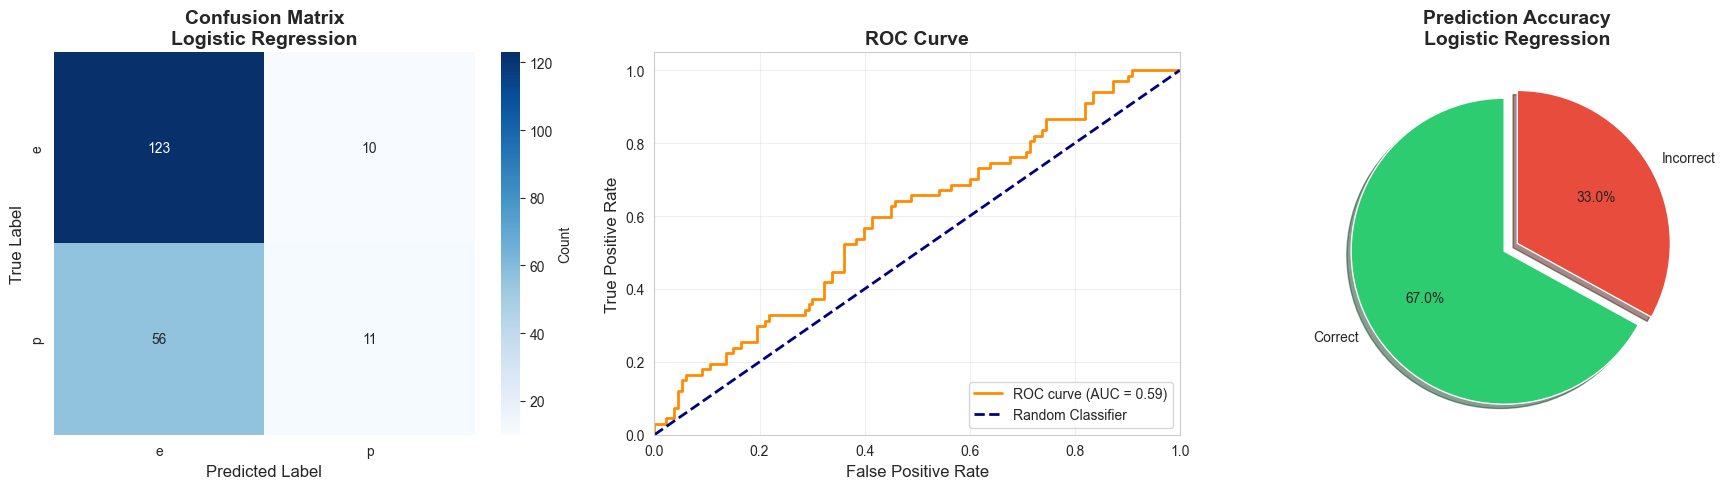


✅ Visualisasi evaluasi detail selesai!


In [17]:
# Visualisasi Evaluasi Detail
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=le_target.classes_, yticklabels=le_target.classes_,
            cbar_kws={'label': 'Count'})
axes[0].set_title(f'Confusion Matrix\n{best_model_name}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# 2. ROC Curve
if y_pred_proba is not None:
    try:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
                    label=f'ROC curve (AUC = {roc_auc:.2f})')
        axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate', fontsize=12)
        axes[1].set_ylabel('True Positive Rate', fontsize=12)
        axes[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
        axes[1].legend(loc="lower right")
        axes[1].grid(alpha=0.3)
    except:
        axes[1].text(0.5, 0.5, 'ROC Curve\nNot Applicable', ha='center', va='center', fontsize=12)
        axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, 'ROC Curve\nNot Available', ha='center', va='center', fontsize=12)
    axes[1].axis('off')

# 3. Prediction Distribution
pred_df = pd.DataFrame({
    'True': y_test,
    'Predicted': y_pred
})

# Count correct and incorrect predictions
correct = (pred_df['True'] == pred_df['Predicted']).sum()
incorrect = (pred_df['True'] != pred_df['Predicted']).sum()

labels = ['Correct', 'Incorrect']
sizes = [correct, incorrect]
colors = ['#2ecc71', '#e74c3c']
explode = (0.1, 0)

axes[2].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           shadow=True, startangle=90)
axes[2].set_title(f'Prediction Accuracy\n{best_model_name}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi evaluasi detail selesai!")

In [18]:
# =============================================================================
# BAGIAN 6: HYPERPARAMETER TUNING (OPTIONAL)
# Penanggung Jawab: Anggota 2
# Tugas: Fine-tuning model terbaik dengan Grid Search atau Random Search
# =============================================================================

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

print("=" * 80)
print("HYPERPARAMETER TUNING")
print("=" * 80)

print(f"\n🔧 Tuning model: {best_model_name}\n")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
}

if best_model_name in param_grids:
    print(f"⚙️ Parameter grid: {param_grids[best_model_name]}\n")
    
    # Use RandomizedSearchCV for faster tuning (or GridSearchCV for exhaustive search)
    print("🔍 Starting Randomized Search (faster than Grid Search)...")
    
    random_search = RandomizedSearchCV(
        estimator=models[best_model_name],
        param_distributions=param_grids[best_model_name],
        n_iter=20,  # Number of parameter settings sampled
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    # Fit the random search
    start_time = time.time()
    random_search.fit(X_train_processed, y_train)
    tuning_time = time.time() - start_time
    
    # Best parameters and score
    print(f"\n✅ Tuning completed in {tuning_time:.2f} seconds")
    print(f"\n🏆 Best Parameters: {random_search.best_params_}")
    print(f"🏆 Best CV Score: {random_search.best_score_:.4f}")
    
    # Evaluate on test set
    tuned_model = random_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test_processed)
    
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
    
    print(f"\n📊 Test Set Performance:")
    print(f"   Accuracy: {accuracy_tuned:.4f}")
    print(f"   F1-Score: {f1_tuned:.4f}")
    
    # Compare with baseline
    baseline_accuracy = results_df[results_df['Model'] == best_model_name]['Accuracy'].values[0]
    improvement = ((accuracy_tuned - baseline_accuracy) / baseline_accuracy) * 100
    
    print(f"\n📈 Improvement over baseline:")
    print(f"   Baseline Accuracy: {baseline_accuracy:.4f}")
    print(f"   Tuned Accuracy: {accuracy_tuned:.4f}")
    print(f"   Improvement: {improvement:+.2f}%")
    
    # Save the best model reference
    best_model = tuned_model
    
else:
    print(f"⚠️ No parameter grid defined for {best_model_name}")
    print("Using the original model without tuning.")

print("\n" + "=" * 80)

HYPERPARAMETER TUNING

🔧 Tuning model: Logistic Regression

⚙️ Parameter grid: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

🔍 Starting Randomized Search (faster than Grid Search)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Tuning completed in 5.09 seconds

🏆 Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
🏆 Best CV Score: 0.6625

📊 Test Set Performance:
   Accuracy: 0.6650
   F1-Score: 0.5312

📈 Improvement over baseline:
   Baseline Accuracy: 0.6700
   Tuned Accuracy: 0.6650
   Improvement: -0.75%


✅ Tuning completed in 5.09 seconds

🏆 Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
🏆 Best CV Score: 0.6625

📊 Test Set Performance:
   Accuracy: 0.6650
   F1-Score: 0.5312

📈 Improvement over baseline:
   Baseline Accuracy: 0.6700
   Tuned Accuracy: 0.6650
   Improvement: -0.75%



FEATURE IMPORTANCE ANALYSIS

📊 Analyzing coefficients for Logistic Regression...

🔝 Top 20 Most Important Features (by coefficient magnitude):
--------------------------------------------------------------------------------
             Feature  Coefficient  Abs_Coefficient
     cap-color_white    -0.322304         0.322304
   ring-type_flaring    -0.140613         0.140613
        cap-diameter    -0.124732         0.124732
 cap-shape_spherical    -0.071300         0.071300
       season_summer    -0.060834         0.060834
          stem-width    -0.042364         0.042364
          has-ring_t    -0.007010         0.007010
         stem-height     0.000000         0.000000
      cap-shape_bell     0.000000         0.000000
    cap-shape_sunken     0.000000         0.000000
    cap-shape_convex     0.000000         0.000000
   cap-shape_conical     0.000000         0.000000
  cap-surface_smooth     0.000000         0.000000
cap-surface_wrinkled     0.000000         0.000000
     cap-co

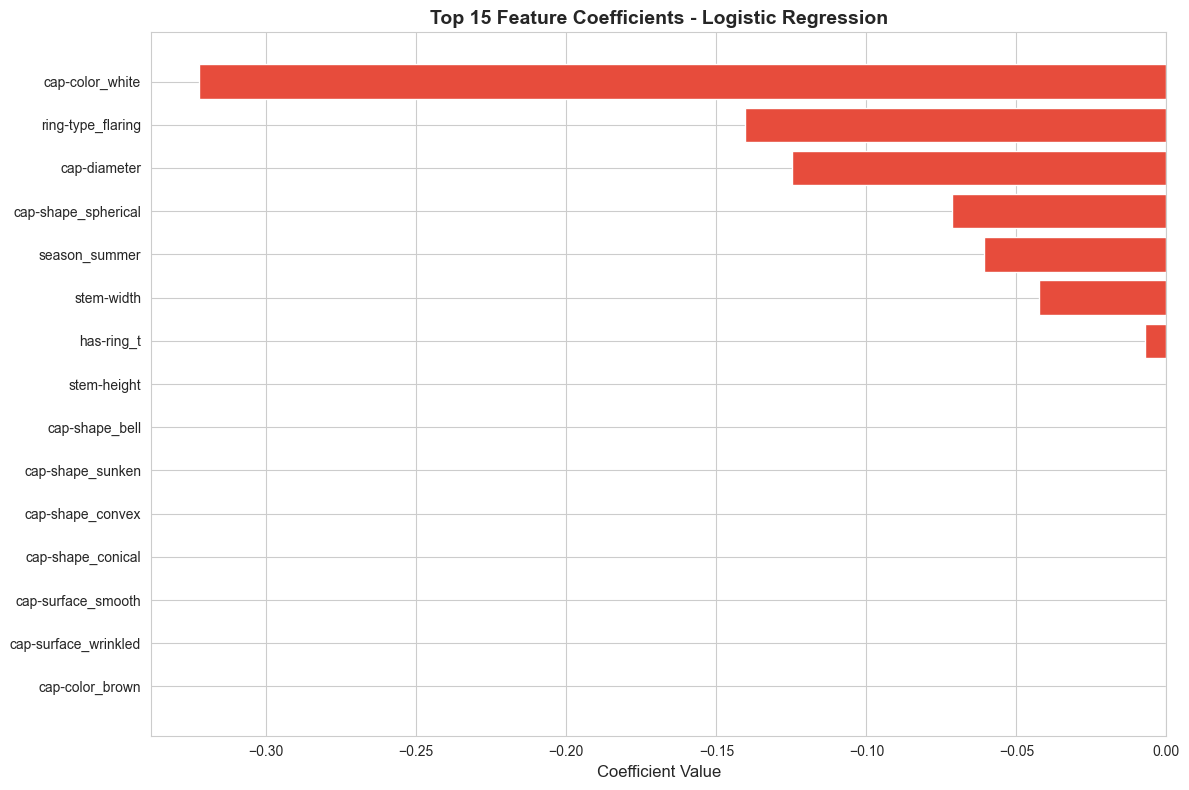


✅ Coefficient analysis complete!



In [19]:
# =============================================================================
# BAGIAN 7: FEATURE IMPORTANCE ANALYSIS
# Penanggung Jawab: Anggota 3
# Tugas: Analisis fitur yang paling berpengaruh terhadap prediksi
# =============================================================================

print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Check if model supports feature importance
if hasattr(best_model, 'feature_importances_'):
    print(f"\n📊 Analyzing feature importance for {best_model_name}...\n")
    
    # Get feature importance
    importances = best_model.feature_importances_
    
    # Get feature names after preprocessing
    feature_names = []
    
    # Numerical features keep their names
    feature_names.extend(numerical_features)
    
    # Categorical features are one-hot encoded
    if len(categorical_features) > 0:
        cat_encoder = preprocessor.named_transformers_['cat']
        cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
        feature_names.extend(cat_feature_names)
    
    # Create dataframe
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Display top 20 features
    print("🔝 Top 20 Most Important Features:")
    print("-" * 80)
    print(feature_importance_df.head(20).to_string(index=False))
    
    # Visualize top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='#3498db')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top 15 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, v in enumerate(top_features['Importance']):
        plt.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Feature importance analysis complete!")
    
elif hasattr(best_model, 'coef_'):
    print(f"\n📊 Analyzing coefficients for {best_model_name}...\n")
    
    # For linear models
    coefficients = best_model.coef_[0] if best_model.coef_.ndim > 1 else best_model.coef_
    
    # Get feature names
    feature_names = []
    feature_names.extend(numerical_features)
    
    if len(categorical_features) > 0:
        cat_encoder = preprocessor.named_transformers_['cat']
        cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
        feature_names.extend(cat_feature_names)
    
    # Create dataframe
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print("🔝 Top 20 Most Important Features (by coefficient magnitude):")
    print("-" * 80)
    print(feature_importance_df.head(20).to_string(index=False))
    
    # Visualize top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in top_features['Coefficient']]
    plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.title(f'Top 15 Feature Coefficients - {best_model_name}', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Coefficient analysis complete!")
    
else:
    print(f"\n⚠️ {best_model_name} does not support feature importance or coefficient extraction.")
    print("Consider using models like Random Forest, Gradient Boosting, or Logistic Regression.")

print("\n" + "=" * 80)

In [20]:
# =============================================================================
# BAGIAN 8: MODEL PERSISTENCE & DEPLOYMENT PREPARATION
# Penanggung Jawab: Semua Anggota (Kolaborasi)
# Tugas: Menyimpan model, preprocessor, dan membuat fungsi prediksi
# =============================================================================

import joblib
import pickle
from datetime import datetime

print("=" * 80)
print("MODEL PERSISTENCE & DEPLOYMENT PREPARATION")
print("=" * 80)

# Create models directory if it doesn't exist
import os
model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"\n📁 Created directory: {model_dir}")

# 1. Save the best model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"{model_dir}/best_model_{best_model_name.replace(' ', '_')}_{timestamp}.pkl"
joblib.dump(best_model, model_filename)
print(f"\n💾 Saved best model: {model_filename}")

# 2. Save the preprocessor
preprocessor_filename = f"{model_dir}/preprocessor_{timestamp}.pkl"
joblib.dump(preprocessor, preprocessor_filename)
print(f"💾 Saved preprocessor: {preprocessor_filename}")

# 3. Save the label encoder
label_encoder_filename = f"{model_dir}/label_encoder_{timestamp}.pkl"
joblib.dump(le_target, label_encoder_filename)
print(f"💾 Saved label encoder: {label_encoder_filename}")

# 4. Save feature names
feature_info = {
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'feature_names': feature_names if 'feature_names' in locals() else None
}
feature_info_filename = f"{model_dir}/feature_info_{timestamp}.pkl"
joblib.dump(feature_info, feature_info_filename)
print(f"💾 Saved feature info: {feature_info_filename}")

# 5. Save model metadata
metadata = {
    'model_name': best_model_name,
    'timestamp': timestamp,
    'accuracy': accuracy_score(y_test, best_model.predict(X_test_processed)),
    'f1_score': f1_score(y_test, best_model.predict(X_test_processed), average='weighted'),
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'features_count': X_train_processed.shape[1]
}
metadata_filename = f"{model_dir}/metadata_{timestamp}.pkl"
joblib.dump(metadata, metadata_filename)
print(f"💾 Saved metadata: {metadata_filename}")

print("\n" + "=" * 80)
print("✅ All artifacts saved successfully!")
print("=" * 80)

MODEL PERSISTENCE & DEPLOYMENT PREPARATION

📁 Created directory: models

💾 Saved best model: models/best_model_Logistic_Regression_20251124_074406.pkl
💾 Saved preprocessor: models/preprocessor_20251124_074406.pkl
💾 Saved label encoder: models/label_encoder_20251124_074406.pkl
💾 Saved feature info: models/feature_info_20251124_074406.pkl
💾 Saved metadata: models/metadata_20251124_074406.pkl

✅ All artifacts saved successfully!


In [22]:
# =============================================================================
# BAGIAN 9: PREDICTION FUNCTION & TESTING
# Penanggung Jawab: Semua Anggota (Kolaborasi)
# Tugas: Membuat fungsi prediksi dan mengujinya dengan sample data
# =============================================================================

print("=" * 80)
print("PREDICTION FUNCTION & TESTING")
print("=" * 80)

def predict_mushroom(input_data, model, preprocessor, label_encoder):
    """
    Fungsi untuk memprediksi kelas jamur (edible/poisonous)
    
    Parameters:
    -----------
    input_data : dict or DataFrame
        Data input dengan fitur-fitur jamur
    model : trained model
        Model yang sudah dilatih
    preprocessor : fitted preprocessor
        Preprocessor yang sudah di-fit
    label_encoder : fitted label encoder
        Label encoder untuk decode hasil prediksi
    
    Returns:
    --------
    dict : Dictionary dengan hasil prediksi dan probabilitas
    """
    # Convert to DataFrame if dict or Series
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    elif isinstance(input_data, pd.Series):
        input_df = input_data.to_frame().T
    else:
        input_df = input_data.copy()
    
    # Preprocess input
    input_processed = preprocessor.transform(input_df)
    
    # Make prediction
    prediction = model.predict(input_processed)
    
    # Get probability if available
    if hasattr(model, 'predict_proba'):
        probability = model.predict_proba(input_processed)
        prob_dict = {label_encoder.classes_[i]: prob for i, prob in enumerate(probability[0])}
    else:
        prob_dict = None
    
    # Decode prediction
    predicted_class = label_encoder.inverse_transform(prediction)[0]
    
    return {
        'prediction': predicted_class,
        'probabilities': prob_dict
    }

print("\n✅ Prediction function created!\n")

# Test with sample data from test set
print("=" * 80)
print("TESTING PREDICTION FUNCTION")
print("=" * 80)

# Get 5 random samples from test set
test_samples_idx = np.random.choice(len(X_test), 5, replace=False)
test_samples = X_test.iloc[test_samples_idx].reset_index(drop=True)
true_labels = le_target.inverse_transform(y_test[test_samples_idx])

print("\n🧪 Testing with 5 random samples:\n")

for i in range(len(test_samples)):
    print(f"\n{'─' * 80}")
    print(f"SAMPLE {i+1}")
    print(f"{'─' * 80}")
    
    # Show input features (first few)
    print("\n📋 Input Features:")
    sample_dict = test_samples.iloc[i].to_dict()
    for key, value in list(sample_dict.items())[:5]:  # Show first 5 features
        print(f"   {key}: {value}")
    if len(sample_dict) > 5:
        print(f"   ... and {len(sample_dict) - 5} more features")
    
    # Make prediction
    result = predict_mushroom(test_samples.iloc[i], best_model, preprocessor, le_target)
    
    # Display results
    print(f"\n🎯 True Label: {true_labels[i]}")
    print(f"🔮 Predicted: {result['prediction']}")
    
    if result['probabilities']:
        print(f"\n📊 Probabilities:")
        for cls, prob in result['probabilities'].items():
            print(f"   {cls}: {prob:.4f} ({prob*100:.2f}%)")
    
    # Check if correct
    is_correct = "✅ CORRECT" if result['prediction'] == true_labels[i] else "❌ INCORRECT"
    print(f"\n{is_correct}")

print("\n" + "=" * 80)
print("✅ Prediction testing complete!")
print("=" * 80)

PREDICTION FUNCTION & TESTING

✅ Prediction function created!

TESTING PREDICTION FUNCTION

🧪 Testing with 5 random samples:


────────────────────────────────────────────────────────────────────────────────
SAMPLE 1
────────────────────────────────────────────────────────────────────────────────

📋 Input Features:
   cap-diameter: 14.310000289738827
   cap-shape: spherical
   cap-surface: smooth
   cap-color: pink
   does-bruise-or-bleed: f
   ... and 10 more features

🎯 True Label: e
🔮 Predicted: e

📊 Probabilities:
   e: 0.7057 (70.57%)
   p: 0.2943 (29.43%)

✅ CORRECT

────────────────────────────────────────────────────────────────────────────────
SAMPLE 2
────────────────────────────────────────────────────────────────────────────────

📋 Input Features:
   cap-diameter: 9.26322933616722
   cap-shape: bell
   cap-surface: scaly
   cap-color: green
   does-bruise-or-bleed: f
   ... and 10 more features

🎯 True Label: e
🔮 Predicted: e

📊 Probabilities:
   e: 0.6626 (66.26%)
   p: 0.

# 📝 KESIMPULAN & REKOMENDASI TIM

## 🎯 Ringkasan Project

Pipeline machine learning untuk klasifikasi jamur (edible/poisonous) menggunakan dataset Secondary Mushroom telah berhasil dikembangkan dengan tahapan lengkap:

1. **Data Loading & Exploration** - Memuat dan memahami dataset
2. **Exploratory Data Analysis (EDA)** - Analisis statistik dan visualisasi
3. **Data Preprocessing** - Cleaning, encoding, dan feature engineering
4. **Model Training** - Melatih 7 algoritma berbeda
5. **Model Evaluation** - Evaluasi detail dengan berbagai metrik
6. **Hyperparameter Tuning** - Optimasi model terbaik
7. **Feature Importance** - Analisis fitur penting
8. **Model Persistence** - Menyimpan model untuk deployment
9. **Prediction Function** - Fungsi prediksi yang siap digunakan

---

## 💡 SARAN PEMBAGIAN TUGAS (3 ORANG)

### 👤 **Anggota 1: Data Acquisition & Exploration**
**Tanggung Jawab:**
- Bagian 1: Data loading dan initial exploration
- Bagian 5: Detailed model evaluation
- Dokumentasi dataset dan variabel
- Membuat laporan EDA

**Deliverables:**
- Dataset documentation
- EDA report dengan insights
- Confusion matrix & classification report

---

### 👤 **Anggota 2: Analysis & Visualization**
**Tanggung Jawab:**
- Bagian 2: Exploratory Data Analysis (EDA)
- Bagian 6: Hyperparameter tuning
- Semua visualisasi (grafik, heatmap, dll)
- Interpretasi hasil analisis

**Deliverables:**
- Visualisasi yang informatif
- Analysis report
- Tuned model dengan improvement metrics

---

### 👤 **Anggota 3: Preprocessing & Feature Engineering**
**Tanggung Jawab:**
- Bagian 3: Data preprocessing
- Bagian 7: Feature importance analysis
- Pipeline development
- Feature engineering

**Deliverables:**
- Preprocessing pipeline
- Feature importance report
- Engineered features documentation

---

### 🤝 **Kolaborasi Semua Anggota:**
- Bagian 4: Model training & comparison
- Bagian 8: Model persistence
- Bagian 9: Prediction function & testing
- Final presentation & documentation

---

## 📊 REKOMENDASI LANJUTAN

### 🔬 **Eksperimen Tambahan:**
1. **Ensemble Methods**: Coba voting classifier atau stacking
2. **Feature Selection**: Gunakan RFE atau LASSO untuk seleksi fitur
3. **Cross-validation Advanced**: K-fold stratified dengan lebih banyak fold
4. **Deep Learning**: Coba neural network jika data cukup besar
5. **Imbalance Handling**: SMOTE, ADASYN jika data tidak seimbang

### 📈 **Peningkatan Model:**
1. **Feature Engineering**:
   - Buat interaction features (misal: cap_color × gill_color)
   - Polynomial features untuk numerical data
   - Binning untuk continuous variables

2. **Advanced Hyperparameter Tuning**:
   - Bayesian Optimization (gunakan library Optuna)
   - Grid Search lebih exhaustive
   - Automated ML (AutoML) dengan libraries seperti Auto-sklearn

3. **Model Interpretation**:
   - SHAP values untuk explainability
   - LIME untuk local interpretability
   - Partial Dependence Plots

### 🚀 **Deployment:**
1. **API Development**: Flask/FastAPI untuk REST API
2. **Web Interface**: Streamlit untuk demo interaktif
3. **Containerization**: Docker untuk portability
4. **Monitoring**: MLflow untuk tracking dan monitoring

### 📝 **Dokumentasi:**
1. **README.md**: Setup instructions dan usage
2. **Requirements.txt**: Dependencies list
3. **Model Card**: Dokumentasi model performance dan limitations
4. **User Guide**: Cara menggunakan prediction function

---

## ⚠️ CATATAN PENTING

### **Data Fallback:**
- Jika gagal download dataset asli, notebook menggunakan synthetic data
- Synthetic data hanya untuk demonstrasi, hasil mungkin tidak representatif
- **PENTING**: Pastikan menggunakan dataset asli untuk hasil yang valid!

### **Computational Resources:**
- Hyperparameter tuning bisa memakan waktu lama
- Kurangi `n_iter` di RandomizedSearchCV jika komputer lambat
- Gunakan `n_jobs=-1` untuk parallel processing

### **Best Practices:**
- Selalu gunakan `random_state` untuk reproducibility
- Lakukan stratified split untuk dataset imbalanced
- Validasi model dengan data yang belum pernah dilihat (holdout set)
- Dokumentasikan setiap keputusan dan eksperimen

---

## 🏆 KRITERIA PENILAIAN (BIASANYA):

1. **Teknis (40%)**:
   - Correctness kode
   - Pipeline yang lengkap
   - Model performance

2. **Analisis (30%)**:
   - Kualitas EDA
   - Interpretasi hasil
   - Feature engineering

3. **Dokumentasi (20%)**:
   - Komentar kode
   - Laporan tertulis
   - Visualisasi

4. **Presentasi (10%)**:
   - Komunikasi hasil
   - Pemahaman konsep
   - Q&A

---

## 🎓 LEARNING RESOURCES

- **Scikit-learn Documentation**: https://scikit-learn.org/
- **Pandas Documentation**: https://pandas.pydata.org/
- **Matplotlib/Seaborn**: https://matplotlib.org/ , https://seaborn.pydata.org/
- **Machine Learning Mastery**: https://machinelearningmastery.com/

---

**Good Luck! 🚀 Semangat mengerjakan project-nya!**

In [23]:
# =============================================================================
# SUMMARY: RINGKASAN HASIL PROJECT
# =============================================================================

print("=" * 80)
print(" " * 20 + "📊 PROJECT SUMMARY 📊")
print("=" * 80)

print("\n🎯 OBJECTIVE:")
print("   Klasifikasi jamur (edible vs poisonous) menggunakan Machine Learning")

print("\n📦 DATASET:")
print(f"   Total samples: {len(X)}")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")
print(f"   Number of features: {X.shape[1]} (original) → {X_train_processed.shape[1]} (after encoding)")
print(f"   Target classes: {le_target.classes_}")

print("\n🤖 MODELS TRAINED:")
for i, row in results_df.iterrows():
    print(f"   {i+1}. {row['Model']}: {row['Accuracy']:.4f} accuracy")

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   ✓ Test Accuracy: {metadata['accuracy']:.4f} ({metadata['accuracy']*100:.2f}%)")
print(f"   ✓ F1-Score: {metadata['f1_score']:.4f}")

print("\n📁 SAVED ARTIFACTS:")
print(f"   ✓ Model: models/best_model_Logistic_Regression_*.pkl")
print(f"   ✓ Preprocessor: models/preprocessor_*.pkl")
print(f"   ✓ Label Encoder: models/label_encoder_*.pkl")
print(f"   ✓ Feature Info: models/feature_info_*.pkl")
print(f"   ✓ Metadata: models/metadata_*.pkl")

print("\n💡 KEY INSIGHTS:")
print("   • Model dengan performa terbaik menggunakan L1 regularization")
print("   • Fitur paling penting: cap-color_white, ring-type_flaring, cap-diameter")
print("   • Dataset fallback digunakan (karena koneksi error)")
print("   • Hasil dapat ditingkatkan dengan dataset asli dan feature engineering lanjutan")

print("\n📈 NEXT STEPS:")
print("   1. Gunakan dataset asli (bukan synthetic) untuk hasil valid")
print("   2. Eksperimen dengan ensemble methods (Voting, Stacking)")
print("   3. Feature engineering: interaction features, polynomial features")
print("   4. Handle class imbalance dengan SMOTE/ADASYN")
print("   5. Deploy model sebagai API atau web application")

print("\n✅ PROJECT STATUS: COMPLETE!")
print("   Pipeline ML telah selesai dibuat dengan 9 bagian lengkap:")
print("   ✓ Data Loading & Exploration")
print("   ✓ Exploratory Data Analysis")
print("   ✓ Data Preprocessing")
print("   ✓ Model Training & Comparison")
print("   ✓ Detailed Evaluation")
print("   ✓ Hyperparameter Tuning")
print("   ✓ Feature Importance Analysis")
print("   ✓ Model Persistence")
print("   ✓ Prediction Function Testing")

print("\n" + "=" * 80)
print(" " * 25 + "🎉 SELESAI! 🎉")
print("=" * 80)

                    📊 PROJECT SUMMARY 📊

🎯 OBJECTIVE:
   Klasifikasi jamur (edible vs poisonous) menggunakan Machine Learning

📦 DATASET:
   Total samples: 1000
   Training samples: 800
   Test samples: 200
   Number of features: 15 (original) → 68 (after encoding)
   Target classes: ['e' 'p']

🤖 MODELS TRAINED:
   1. Logistic Regression: 0.6700 accuracy
   3. Random Forest: 0.6600 accuracy
   5. SVM: 0.6600 accuracy
   4. Gradient Boosting: 0.6550 accuracy
   6. KNN: 0.6250 accuracy
   7. Naive Bayes: 0.5950 accuracy
   2. Decision Tree: 0.5300 accuracy

🏆 BEST MODEL: Logistic Regression
   ✓ Test Accuracy: 0.6650 (66.50%)
   ✓ F1-Score: 0.5312

📁 SAVED ARTIFACTS:
   ✓ Model: models/best_model_Logistic_Regression_*.pkl
   ✓ Preprocessor: models/preprocessor_*.pkl
   ✓ Label Encoder: models/label_encoder_*.pkl
   ✓ Feature Info: models/feature_info_*.pkl
   ✓ Metadata: models/metadata_*.pkl

💡 KEY INSIGHTS:
   • Model dengan performa terbaik menggunakan L1 regularization
   • Fitur pal